In [1283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date


In [1284]:
chantiers = pd.read_csv('chantiers-a-paris.csv', delimiter = ';') # do we want older or more recent data ?
chantiers_pertu = pd.read_csv('chantiers-perturbants.csv', delimiter = ';') # do we want older or more recent data ?
traffic = pd.read_csv('comptages-routiers-permanents.csv', delimiter = ';') # do we want older or more recent data ?
calendar = pd.read_csv('dimdate-QueryResult.csv', delimiter = ',') # do we want older or more recent data ?
vacations = pd.read_csv('fr-en-calendrier-scolaire.csv', delimiter = ';') # do we want older or more recent data ?
weather = pd.read_csv('donnees-synop-essentielles-omm.csv', delimiter = ';') # do we want older or more recent data ?
markets = pd.read_csv('marches-decouverts.csv', delimiter = ';') # do we want older or more recent data ?
events = pd.read_csv('que-faire-a-paris-.csv', delimiter = ';') # do we want older or more recent data ?
touristic_zones = pd.read_csv('zones-touristiques-internationales.csv', delimiter = ';') # do we want older or more recent data ?


In [1285]:
chantiers = chantiers[['Code postal arrondissement - Commune',
                                   'Date début du chantier', 
                                   'Date fin du chantier',
                                   'Synthèse - Nature du chantier',
                                   'Encombrement espace public',]]

chantiers_pertu = chantiers_pertu[["Code postal de l'arrondissement", 
                                                "Typologie",  
                                                'Objet', 
                                                'Voie(s)',  
                                                'Date de début', 
                                                'Date de fin', 
                                                'Impact sur la circulation', 
                                                'Niveau de perturbation',
                                                'Statut',]]

traffic = traffic.drop(columns=['geo_point_2d', 'geo_shape', 'Date debut dispo data', 'Date fin dispo data'])

calendar = calendar[['word_date', 
                     'date', 
                     'year', 
                     'quarter', 
                     'month',
                     'yearmonth', 
                     'day_of_month', 
                     'week', 
                     'day_of_week', 
                     'weekday',
                     'month_and_year', 
                     'holiday']]

vacations = vacations[['Description', 
                     'Population', 
                     'Date de début', 
                     'Date de fin',
                     'Académies', 
                     'Zones', 
                     'annee_scolaire']]

weather = weather[[ "Température (°C)", 
                   'Humidité',
                   'Nebulosité totale', 
                   'Variation de pression en 24 heures',
                   'Précipitations dans les 24 dernières heures', 
                   'Précipitations dans la dernière heure',
                   "Pression station",
                    "Vitesse du vent moyen 10 mn",
                   "Date"]]

markets = markets[["Identifiant marché"
                    'Produit',
                   'Arrondissement', 
                   'Jours de tenue', 
                   'LUNDI', 
                   'MARDI',
                   'MERCREDI', 
                   'JEUDI', 
                   'VENDREDI', 
                   'SAMEDI', 
                   'DIMANCHE', 
                   'Secteur',
                   'Heure début en semaine',
                   'Heure fin en semaine', 
                   'Heure début le samedi', 
                   'Heure fin le samedi',
                   'Heure début le dimanche', 
                   'Heure fin le dimanche']]


events = events[['Date de début',
                 'Date de fin',
                 'Occurrences',
                 'Mots clés',  
                 'Code postal']]

touristic_zones = touristic_zones[['name', 'type', '@timestamp']]

KeyError: "['Identifiant marchéProduit'] not in index"

In [1286]:
amont = traffic[traffic["Libelle noeud amont"].isin(['Av_Champs_Elysees-Washington', "Convention-Blomet", "Sts_Peres-Voltaire"])]
aval_amont = amont[amont["Libelle noeud aval"].isin(['Av_Champs_Elysees-Berri', "Lecourbe-Convention", "Sts_Peres-Universite"]) ]

In [1287]:

aval_amont["timestamp"] = pd.to_datetime(aval_amont["Date et heure de comptage"], utc=True)
aval_amont["timestamp_short"] = aval_amont["timestamp"].dt.strftime('%Y-%m-%dT%H:%M')
aval_amont["date"] = aval_amont["timestamp"].dt.strftime('%Y-%m-%d')

C:\Users\guill\AppData\Local\Temp\ipykernel_3644\2760610762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["timestamp"] = pd.to_datetime(aval_amont["Date et heure de comptage"], utc=True)
C:\Users\guill\AppData\Local\Temp\ipykernel_3644\2760610762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["timestamp_short"] = aval_amont["timestamp"].dt.strftime('%Y-%m-%dT%H:%M')
C:\Users\guill\AppData\Local\Temp\ipykernel_3644\2760610762.py:3: SettingWithCopyWarning: 
A value is trying t

In [1288]:
dict_arr = {"AV_Champs_Elysees": 75008, "Sts_Peres": 75007,  "Convention": 75015}
aval_amont["arrondissement"] = aval_amont['Libelle'].apply(lambda x: dict_arr[x])

C:\Users\guill\AppData\Local\Temp\ipykernel_3644\890006473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_amont["arrondissement"] = aval_amont['Libelle'].apply(lambda x: dict_arr[x])


In [1289]:
y = aval_amont[["Débit horaire"	, "Taux d'occupation",]]
X = aval_amont[["timestamp", "Libelle", "Identifiant arc", "arrondissement", "date"]]

# Holidays

In [1290]:
calendar["date"] = pd.to_datetime(calendar["word_date"], utc=True)
calendar["date"] = calendar["date"].dt.strftime('%Y-%m-%d')

calendar["holiday"] = calendar["holiday"].apply(lambda x: None if x in ['MLK', 'USPRESIDENTS', 'VICTORIA', 'MEMORIAL',  'CANADA',
       'USINDEPENDENCE','THANKSGIVINGCANADA', 'VETERANS',  'VETERANSUSG'] else x)

calendar["is_holiday"] = calendar["holiday"].isna().apply(lambda x: 1 if x!=True else 0)

vacations["start_date"] = pd.to_datetime(vacations["Date de début"], utc=True)
vacations["start_date"] = vacations["start_date"].dt.strftime('%Y-%m-%d')

vacations["end_date"] = pd.to_datetime(vacations["Date de fin"], utc=True)
vacations["end_date"] = vacations["end_date"].dt.strftime('%Y-%m-%d')

vacations = vacations[["start_date", "end_date"]]

calendar['key'] = 0
vacations['key'] = 0

special_days =calendar.merge(vacations,on='key', how='outer').drop(columns=["key"])
special_days["holiday_period"] =special_days.apply(lambda x: 1 if ((x[1]>=x[-2]) and (x[1]<=x[-1])) else 0, axis=1)

special_days = special_days[["date", "holiday_period", "holiday", "is_holiday"] ]

special_days = special_days.groupby("date").max()

# Road Works

In [1291]:
chantiers["arrondissement"] = chantiers["Code postal arrondissement - Commune"]
chantiers["start_date"] = pd.to_datetime(chantiers["Date début du chantier"], utc=True)
chantiers["start_date"] = chantiers["start_date"].dt.strftime('%Y-%m-%d')

chantiers["end_date"] = pd.to_datetime(chantiers["Date fin du chantier"], utc=True)
chantiers["end_date"] = chantiers["end_date"].dt.strftime('%Y-%m-%d')

chantiers = chantiers[["start_date", "end_date", "arrondissement"]]

calendar['key'] = 0
chantiers['key'] = 0

chantiers1 =calendar.merge(chantiers,on='key', how='outer').drop(columns=["key"])
chantiers1["chantiers1"] =chantiers1.apply(lambda x: 1 if ((x[1]>=x[-3]) and (x[1]<=x[-2])) else 0, axis=1)

chantiers1 = chantiers1[["date", "chantiers1", "arrondissement"] ]
final_chantiers1 = chantiers1.groupby(by =["date", "arrondissement"]).agg({'chantiers1': 'max'}).reset_index()

In [1292]:
chantiers_pertu["arrondissement"] = chantiers_pertu["Code postal de l'arrondissement"]
chantiers_pertu["start_date"] = pd.to_datetime(chantiers_pertu["Date de début"], utc=True)
chantiers_pertu["start_date"] = chantiers_pertu["start_date"].dt.strftime('%Y-%m-%d')

chantiers_pertu["end_date"] = pd.to_datetime(chantiers_pertu["Date de fin"], utc=True)
chantiers_pertu["end_date"] = chantiers_pertu["end_date"].dt.strftime('%Y-%m-%d')

chantiers_pertu = chantiers_pertu[["start_date", "end_date", "arrondissement",  "Niveau de perturbation", "Statut"]]

calendar['key'] = 0
chantiers_pertu['key'] = 0

chantiers_pertu1 =calendar.merge(chantiers_pertu,on='key', how='outer').drop(columns=["key"])
chantiers_pertu1["chantiers_pertu1"] =chantiers_pertu1.apply(lambda x: 1 if ((x[1]>=x[-5]) and (x[1]<=x[-4])) else 0, axis=1)

chantiers_pertu1 = chantiers_pertu1[["date", "chantiers_pertu1", "arrondissement",  "Niveau de perturbation", "Statut"] ]
final_chantiers_pertu1 = chantiers_pertu1.groupby(by =["date", "arrondissement"]).max().reset_index()

# Weather

In [1293]:
weather_df = weather.rename(columns={"Date" : "timestamp",
                            "Nebulosité totale" : "visibility",
                            "Pression station" : 'atm_pressure',
                             "Vitesse du vent moyen 10 mn" : "wind_speed",
                             "Température (°C)" : "temp", 
                             "Humidité" : 'humidity', 
                             "Précipitations dans la dernière heure" : "rain"})

weather_df["timestamp"] = pd.to_datetime(weather_df["timestamp"], utc=True)

weather_df = weather_df.set_index('timestamp').resample('1H').interpolate().reset_index()

# Events

In [1294]:
events["arrondissement"] = events["Code postal"]
events["start_date"] = pd.to_datetime(events["Date de début"], utc=True)
events["start_date"] = events["start_date"].dt.strftime('%Y-%m-%d')

events["end_date"] = pd.to_datetime(events["Date de fin"], utc=True)
events["end_date"] = events["end_date"].dt.strftime('%Y-%m-%d')

events = events[["start_date", "end_date", "arrondissement"]]
events["event_duration"]=  (pd.to_datetime(events["end_date"] )- pd.to_datetime( events["start_date"])).dt.days +1

events_arr = events[events["arrondissement"].isin(["75007", "75008", "75015"])]

calendar['key'] = 0
events_arr['key'] = 0

events1 =calendar.merge(events_arr,on='key', how='outer').drop(columns=["key"])


C:\Users\guill\AppData\Local\Temp\ipykernel_3644\3454438259.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_arr['key'] = 0


In [1295]:

events1["events1"] =events1.apply(lambda x: 1 if ((x['date'] >= x['start_date']) and (x['date'] <= x['end_date'])) else 0, axis=1)


In [1296]:
events1 = events1[events1['events1']==1]
events1["short_event"] = events1["event_duration"].apply(lambda x: 1 if x < 15 else 0)
events1["long_event"] = events1["event_duration"].apply(lambda x: 1 if x >= 15 else 0)

In [1297]:

final_events1 = events1[["date", 'arrondissement','events1', 'short_event', 'long_event']].groupby(by =["date", "arrondissement"]).sum().reset_index()
final_events1["arrondissement"] = final_events1["arrondissement"].astype(int)

# Markets

In [1298]:
markets = markets[markets["Arrondissement"].isin([6, 7, 8, 15])]
markets["Arrondissement"] = markets["Arrondissement"]+75000
# markets = markets[['Produit', 'Arrondissement', 'LUNDI', 'MARDI','MERCREDI', 'JEUDI', 'VENDREDI', 'SAMEDI', 'DIMANCHE']]
markets1 = pd.melt(markets, id_vars=['Produit', "Arrondissement"], var_name='Day', value_name='IsEventDay')

# Filter only rows where the event is on that day
markets1 = markets1[markets1['IsEventDay'] == 1]

markets1["Day"] = markets1["Day"].str.lower()

french_day_mapping = {
    'lundi': 1,
    'mardi': 2,
    'mercredi': 3,
    'jeudi': 4,
    'vendredi': 5,
    'samedi': 6,
    'dimanche': 7
}

markets1['Day'] = markets1['Day'].map(french_day_mapping)


C:\Users\guill\AppData\Local\Temp\ipykernel_3644\2420947630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  markets["Arrondissement"] = markets["Arrondissement"]+75000


In [1299]:
# Identify rows where 'samedi' column has value 1
mask = markets['SAMEDI'] == 1

# Create markets2 DataFrame based on identified rows
markets2 = markets.loc[mask, ['Identifiant marché', 'Heure début le samedi', 'Heure fin le samedi', "Arrondissement"]]

markets2['day'] = 6
columns = {"Heure début le samedi": 'heure_debut', 'Heure fin le samedi': 'heure_fin'}
markets2 = markets2.rename(columns=columns)

mask = markets['DIMANCHE'] == 1
markets3 = markets.loc[mask, ['Identifiant marché', 'Heure début le dimanche', 'Heure fin le dimanche', "Arrondissement"]]
markets3['day'] = 7
columns = {"Heure début le dimanche": 'heure_debut', 'Heure fin le dimanche': 'heure_fin'}
markets3 = markets3.rename(columns=columns)

stacked_df = pd.concat([markets2, markets3], ignore_index=True, axis=0)

day_map = {'LUNDI': 1, 'MARDI': 2, 'MERCREDI': 3, 'JEUDI': 4, 'VENDREDI': 5}

# Create an empty DataFrame to store results
markets_result = pd.DataFrame(columns=['Identifiant marché', 'Heure début en semaine', 'Heure fin en semaine', 'day', "Arrondissement"])

# Iterate through each day and filter rows
for day, day_num in day_map.items():
    mask = markets[day] == 1
    day_df = markets.loc[mask, ['Identifiant marché', 'Heure début en semaine', 'Heure fin en semaine', "Arrondissement"]]
    day_df['day'] = day_num
    markets_result = pd.concat([markets_result, day_df])

columns = {"Heure début en semaine": 'heure_debut', 'Heure fin en semaine': 'heure_fin'}
markets_result = markets_result.rename(columns=columns)

stacked_df_1 = pd.concat([stacked_df, markets_result], ignore_index=True, axis=0)

stacked_df_1.rename(columns={'Arrondissement': 'arrondissement'}, inplace=True)
stacked_df_1.rename(columns={'day': 'weekday'}, inplace=True)


In [1324]:
markets_final = stacked_df_1.groupby(by = ["arrondissement", "weekday", ]).agg({"Identifiant marché" :"count", "heure_debut" : "max", "heure_fin":"min"})
markets_final.rename(columns={'Identifiant marché': 'number_markets'}, inplace=True)
markets_final.reset_index(inplace=True)

markets_final["starting_hour"] = pd.to_datetime(markets_final["heure_debut"]).dt.hour -2
markets_final["stopping_hour"] =  pd.to_datetime(markets_final["heure_fin"]).dt.hour +2

markets_final.drop(columns = ["heure_debut", "heure_fin"], inplace=True)

C:\Users\guill\AppData\Local\Temp\ipykernel_3644\2767719341.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  markets_final["starting_hour"] = pd.to_datetime(markets_final["heure_debut"]).dt.hour -2
C:\Users\guill\AppData\Local\Temp\ipykernel_3644\2767719341.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  markets_final["stopping_hour"] =  pd.to_datetime(markets_final["heure_fin"]).dt.hour +2


# Calendar

In [1301]:
calendar_final = calendar[['date', 'year', 'quarter', 'month', 'yearmonth',
       'day_of_month', 'week', 'day_of_week', 'weekday',]]



# Merging everything


In [1326]:
traffic_holidays = aval_amont.merge(special_days, on="date", how="left")
traffic_roadworks = traffic_holidays.merge(final_chantiers1, on=["date", "arrondissement"], how="left")
traffic_roadworks2 = traffic_roadworks.merge(final_chantiers_pertu1, on=["date", "arrondissement"], how="left")
traffic_weather = traffic_roadworks2.merge(weather_df, on="timestamp", how="left")

traffic_events = traffic_weather.merge(final_events1, on=["date", "arrondissement"], how="left")

traffic_calendar = traffic_events.merge(calendar_final, on = ["date"], how = "left")

traffic_markets = traffic_calendar.merge(markets_final, on = ["weekday", "arrondissement"], how = "left")

In [1327]:
traffic_markets["timestamp_hour"] = traffic_markets["timestamp"].dt.hour


In [1328]:
traffic_markets["ongoing_market"] = traffic_markets.apply(lambda x: 1 if x["starting_hour"] <= x["timestamp_hour"] <= x["stopping_hour"] else 0, axis = 1)

In [1132]:
test = traffic_events[traffic_events["Libelle"]=="AV_Champs_Elysees"].sort_values(by=['timestamp'])

In [1133]:
time_diff = test['timestamp'].diff()

# Find the indices where the time difference is greater than one hour
gap_indices = time_diff[time_diff > pd.Timedelta(hours=1)].index

In [1136]:
test.loc[gap_indices]

,timestamp,Libelle,Identifiant arc,arrondissement,date,holiday_period,holiday,is_holiday,chantiers1,chantiers_pertu1,...,humidity,visibility,Variation de pression en 24 heures,Précipitations dans les 24 dernières heures,rain,atm_pressure,wind_speed,events1,short_event,long_event
17807,2022-12-21 00:00:00+00:00,AV_Champs_Elysees,4264,75008,2022-12-21,1,NaN,0,1,1,...,92.000000,100.000000,-320.000000,7.400000,-0.100000,100190.000000,4.400000,3.0,0.0,3.0
8164,2023-02-07 00:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-02-07,0,NaN,0,1,1,...,82.000000,0.000000,-590.000000,0.000000,0.000000,102500.000000,2.800000,6.0,0.0,6.0
1574,2023-02-08 12:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-02-08,0,NaN,0,1,1,...,44.000000,0.000000,-210.000000,0.000000,0.000000,102360.000000,1.800000,6.0,0.0,6.0
4380,2023-04-01 23:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-04-01,0,NaN,0,1,1,...,79.666667,90.000000,940.000000,1.600000,0.000000,100246.666667,5.866667,7.0,0.0,7.0
12876,2023-05-03 23:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-05-03,1,NaN,0,1,1,...,63.333333,67.222222,-753.333333,0.000000,0.000000,100733.333333,3.600000,7.0,0.0,7.0
12086,2023-05-23 23:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-05-23,0,NaN,0,1,1,...,67.666667,60.000000,343.333333,-0.100000,0.000000,101300.000000,5.333333,7.0,0.0,7.0
11083,2023-08-04 05:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-08-04,1,NaN,0,1,1,...,93.000000,93.333333,1143.333333,3.866667,0.000000,100420.000000,2.700000,9.0,0.0,9.0
10200,2023-08-08 14:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-08-08,1,NaN,0,1,1,...,44.666667,85.000000,-373.333333,0.000000,0.000000,100673.333333,5.266667,9.0,0.0,9.0
27500,2023-10-29 01:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-10-29,1,NaN,0,1,1,...,87.666667,100.000000,-343.333333,9.633333,-0.066667,98346.666667,6.366667,18.0,0.0,18.0


In [1131]:
9311/24

387.9583333333333

In [1124]:
y

,Débit horaire,Taux d'occupation
0,764.0,11.28000
1,819.0,16.52056
2,1082.0,19.98722
3,1027.0,23.27334
4,257.0,3.04445
...,...,...
232530,326.0,3.92334
232542,61.0,0.74666
232578,16.0,0.70500
232579,20.0,0.39444


In [1108]:
traffic_weather.head()

,timestamp,Libelle,Identifiant arc,arrondissement,date,holiday_period,holiday,is_holiday,chantiers1,chantiers_pertu1,Niveau de perturbation,Statut,temp,humidity,visibility,Variation de pression en 24 heures,Précipitations dans les 24 dernières heures,rain,atm_pressure,wind_speed
0,2023-02-01 22:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0,1,1,2.0,4,6.733333,76.000000,90.000000,143.333333,0.000000,0.0,101900.000000,3.133333
1,2023-02-01 21:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0,1,1,2.0,4,7.400000,73.000000,90.000000,120.000000,0.000000,0.0,101890.000000,3.300000
2,2023-02-01 19:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0,1,1,2.0,4,8.066667,67.000000,90.000000,86.666667,-0.066667,0.0,101856.666667,3.566667
3,2023-02-01 17:00:00+00:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0,1,1,2.0,4,8.266667,65.111111,88.333333,48.888889,-0.100000,0.0,101838.888889,3.622222
4,2023-08-09 22:00:00+00:00,Sts_Peres,191,75007,2023-08-09,1,NaN,0,1,0,2.0,4,16.533333,83.333333,51.666667,356.666667,-0.100000,0.0,100950.000000,0.633333


In [1084]:
traffic_roadworks2.head()

,Date et heure de comptage,Libelle,Identifiant arc,arrondissement,date,holiday_period,holiday,is_holiday,chantiers1,chantiers_pertu1,Niveau de perturbation,Statut
0,2023-02-01T23:00:00+01:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0,1,1,2.0,4
1,2023-02-01T22:00:00+01:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0,1,1,2.0,4
2,2023-02-01T20:00:00+01:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0,1,1,2.0,4
3,2023-02-01T18:00:00+01:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0,1,1,2.0,4
4,2023-08-10T00:00:00+02:00,Sts_Peres,191,75007,2023-08-09,1,NaN,0,1,0,2.0,4


In [1073]:
X.shape

(27930, 5)

In [1075]:
traffic_holidays

,Date et heure de comptage,Libelle,Identifiant arc,arrondissement,date,holiday_period,holiday,is_holiday
0,2023-02-01T23:00:00+01:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0
1,2023-02-01T22:00:00+01:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0
2,2023-02-01T20:00:00+01:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0
3,2023-02-01T18:00:00+01:00,AV_Champs_Elysees,4264,75008,2023-02-01,0,NaN,0
4,2023-08-10T00:00:00+02:00,Sts_Peres,191,75007,2023-08-09,1,NaN,0
...,...,...,...,...,...,...,...,...
27925,2023-08-01T02:00:00+02:00,AV_Champs_Elysees,4264,75008,2023-08-01,1,NaN,0
27926,2023-08-01T01:00:00+02:00,Convention,5672,75015,2023-07-31,1,NaN,0
27927,2023-08-01T04:00:00+02:00,Convention,5672,75015,2023-08-01,1,NaN,0
27928,2023-08-01T03:00:00+02:00,Convention,5672,75015,2023-08-01,1,NaN,0


In [1069]:
X.columns

Index(['Date et heure de comptage', 'Libelle', 'Identifiant arc',
       'arrondissement', 'date'],
      dtype='object')

In [975]:
#435 nulls
aval_amont[aval_amont[["Débit horaire", "Taux d'occupation"]].isna().any(axis=1)]

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,timestamp,timestamp_short,date,arrondissement
230,5672,Convention,2023-02-08T13:00:00+01:00,NaN,NaN,Inconnu,2973,Convention-Blomet,2937,Lecourbe-Convention,Invalide,2023-02-08 12:00:00+00:00,2023-02-08T12:00,2023-02-08,75015
685,4264,AV_Champs_Elysees,2023-11-06T09:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2023-11-06 08:00:00+00:00,2023-11-06T08:00,2023-11-06,75008
1398,4264,AV_Champs_Elysees,2022-11-08T10:00:00+01:00,NaN,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2022-11-08 09:00:00+00:00,2022-11-08T09:00,2022-11-08,75008
2447,5672,Convention,2023-11-06T08:00:00+01:00,NaN,NaN,Inconnu,2973,Convention-Blomet,2937,Lecourbe-Convention,Invalide,2023-11-06 07:00:00+00:00,2023-11-06T07:00,2023-11-06,75015
3095,191,Sts_Peres,2023-02-02T12:00:00+01:00,NaN,NaN,Inconnu,114,Sts_Peres-Voltaire,119,Sts_Peres-Universite,Invalide,2023-02-02 11:00:00+00:00,2023-02-02T11:00,2023-02-02,75007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227209,4264,AV_Champs_Elysees,2023-01-01T01:00:00+01:00,116.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Barré,2023-01-01 00:00:00+00:00,2023-01-01T00:00,2023-01-01,75008
228570,4264,AV_Champs_Elysees,2023-01-01T00:00:00+01:00,3.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Barré,2022-12-31 23:00:00+00:00,2022-12-31T23:00,2022-12-31,75008
228859,4264,AV_Champs_Elysees,2023-10-29T05:00:00+01:00,825.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2023-10-29 04:00:00+00:00,2023-10-29T04:00,2023-10-29,75008
229116,4264,AV_Champs_Elysees,2022-12-31T23:00:00+01:00,9.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Barré,2022-12-31 22:00:00+00:00,2022-12-31T22:00,2022-12-31,75008


In [620]:
champs = aval_amont[aval_amont['Libelle'] == "AV_Champs_Elysees"].sort_values(by=["Date et heure de comptage"], ascending=True)
conv =  aval_amont[aval_amont['Libelle'] == "Conventions"].sort_values(by=["Date et heure de comptage"], ascending=True)
sts = aval_amont[aval_amont['Libelle'] == "Sts_Peres"].sort_values(by=["Date et heure de comptage"], ascending=True)

In [625]:
champs.merge(calendar, on="date", how = "inner")

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,...,month,yearmonth,day_of_month,week,day_of_week,weekday,month_and_year,holiday,is_holiday,key
0,4264,AV_Champs_Elysees,2022-11-01T04:00:00+01:00,672.0,8.89223,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2022-11,1,44,Tue,3,1960-01,NaN,0,0
1,4264,AV_Champs_Elysees,2022-11-01T05:00:00+01:00,513.0,7.12889,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2022-11,1,44,Tue,3,1960-01,NaN,0,0
2,4264,AV_Champs_Elysees,2022-11-01T06:00:00+01:00,494.0,6.22500,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2022-11,1,44,Tue,3,1960-01,NaN,0,0
3,4264,AV_Champs_Elysees,2022-11-01T07:00:00+01:00,513.0,5.80723,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2022-11,1,44,Tue,3,1960-01,NaN,0,0
4,4264,AV_Champs_Elysees,2022-11-01T08:00:00+01:00,484.0,5.57111,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2022-11,1,44,Tue,3,1960-01,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9309,4264,AV_Champs_Elysees,2023-11-30T20:00:00+01:00,1433.0,30.87000,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2023-11,30,48,Thu,5,1960-01,NaN,0,0
9310,4264,AV_Champs_Elysees,2023-11-30T21:00:00+01:00,1253.0,24.38111,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2023-11,30,48,Thu,5,1960-01,NaN,0,0
9311,4264,AV_Champs_Elysees,2023-11-30T22:00:00+01:00,1069.0,20.40723,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2023-11,30,48,Thu,5,1960-01,NaN,0,0
9312,4264,AV_Champs_Elysees,2023-11-30T23:00:00+01:00,950.0,16.66334,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,...,11,2023-11,30,48,Thu,5,1960-01,NaN,0,0


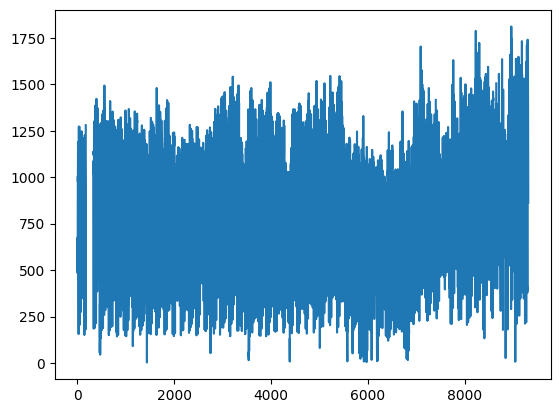

In [623]:
plt.plot(list(range(9314)), champs["Débit horaire"])